### Data 설명
 18명의 '가','다','사','아','카' 손글씨
- train data : 2세트
- test data : 1세트

size : 28*28

파일명 : 글자_이름_세트번호_고유번호

### 1. keras
 1. 분류기 만들기
 2. ImageDataGenerator 사용하여 이미지 증식 후 데이터 분류기 만들기
 3. 작성자 분류기 만들기

### 2. tensorflow
 1. 분류기 만들기
 2. ImageDataGenerator 사용하여 이미지 증식 후 데이터 분류기 만들기
 3. 작성자 분류기 만들기

In [1]:
import pandas as pd
import numpy as np
import random
np.random.seed(42)

# tensorflow
import tensorflow as tf
tf.set_random_seed(42)

# keras
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 시각화
import matplotlib.pyplot as plt

import os

Using TensorFlow backend.


In [82]:
# xTrain=[]
# yTrain=[]
# for i in range(180):
#     x,y = train[i]
#     xTrain.append(x)
#     yTrain.append(y)
    
# xTest=[]
# yTest=[]
# for i in range(90):
#     x,y = test[i]
#     xTest.append(x)
#     yTest.append(y)

In [84]:
# xTrain = np.array(xTrain).reshape([180, 28, 28, 3])
# xTest = np.array(xTest).reshape([90, 28, 28, 3])
# yTrain = np.array(yTrain)
# yTest = np.array(yTest)

# 1. keras
## 1.1 이미지 분류기 만들기

In [2]:
imageDataGen = ImageDataGenerator(rescale = 1./255)
train = imageDataGen.flow_from_directory("./data/img_data/handwriting/train",
                                        target_size = (28,28),
                                        batch_size = 5,
                                        class_mode = 'categorical')

test = imageDataGen.flow_from_directory("./data/img_data/handwriting/test",
                                        target_size = (28,28),
                                        batch_size = 5,
                                        class_mode = 'categorical')

Found 180 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [3]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=(28,28,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())



model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
#모델 최적화()
modelDir='./CNNmodel/' # '.' 현재 디렉토리를 의미. 현재 디렉토리 안에 myModel 디렉토리 생성하기 위해
if not os.path.exists(modelDir): #만약 myModel 디렉토리가 존재하지 않는다면 # =>os 모듈이 필요했기에 import
    os.mkdir(modelDir)
modelPath="./CNNmodel/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpoint = ModelCheckpoint(filepath = modelPath, monitor='val_loss', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=32)

# np.random.seed(42)
hist = model.fit_generator(train,
                   steps_per_epoch=15,
                   epochs=100,
                   validation_data=test,
                   validation_steps=5,
                   callbacks=[es,checkpoint])


Epoch 1/100
15/15 [==============================] - 2s 106ms/step - loss: 1.7093 - accuracy: 0.1467 - val_loss: 1.6266 - val_accuracy: 0.1200

Epoch 00001: val_loss improved from inf to 1.62664, saving model to ./CNNmodel/01-1.6266.hdf5
Epoch 2/100
15/15 [==============================] - 1s 98ms/step - loss: 1.6218 - accuracy: 0.2133 - val_loss: 1.6063 - val_accuracy: 0.2400

Epoch 00002: val_loss improved from 1.62664 to 1.60634, saving model to ./CNNmodel/02-1.6063.hdf5
Epoch 3/100
15/15 [==============================] - 2s 103ms/step - loss: 1.6167 - accuracy: 0.1200 - val_loss: 1.6097 - val_accuracy: 0.1600

Epoch 00003: val_loss did not improve from 1.60634
Epoch 4/100
15/15 [==============================] - 2s 104ms/step - loss: 1.6099 - accuracy: 0.1467 - val_loss: 1.6138 - val_accuracy: 0.2400

Epoch 00004: val_loss did not improve from 1.60634
Epoch 5/100
15/15 [==============================] - 1s 96ms/step - loss: 1.6106 - accuracy: 0.2000 - val_loss: 1.6121 - val_accur


Epoch 00039: val_loss did not improve from 0.04255
Epoch 40/100
15/15 [==============================] - 2s 103ms/step - loss: 0.2051 - accuracy: 0.9600 - val_loss: 0.1103 - val_accuracy: 0.8400

Epoch 00040: val_loss did not improve from 0.04255
Epoch 41/100
15/15 [==============================] - 1s 98ms/step - loss: 0.2642 - accuracy: 0.8933 - val_loss: 0.3639 - val_accuracy: 0.7200

Epoch 00041: val_loss did not improve from 0.04255
Epoch 42/100
15/15 [==============================] - 2s 109ms/step - loss: 0.3536 - accuracy: 0.8800 - val_loss: 0.4836 - val_accuracy: 0.8800

Epoch 00042: val_loss did not improve from 0.04255
Epoch 43/100
15/15 [==============================] - 2s 102ms/step - loss: 0.3454 - accuracy: 0.8533 - val_loss: 4.1376 - val_accuracy: 0.7600

Epoch 00043: val_loss did not improve from 0.04255
Epoch 44/100
15/15 [==============================] - 2s 109ms/step - loss: 0.2425 - accuracy: 0.9067 - val_loss: 0.9138 - val_accuracy: 0.7600

Epoch 00044: val_los

15/15 [==============================] - 2s 101ms/step - loss: 0.0741 - accuracy: 0.9867 - val_loss: 0.0033 - val_accuracy: 0.8800

Epoch 00081: val_loss did not improve from 0.00045
Epoch 82/100
15/15 [==============================] - 2s 104ms/step - loss: 0.1929 - accuracy: 0.9067 - val_loss: 1.4067 - val_accuracy: 0.7600

Epoch 00082: val_loss did not improve from 0.00045
Epoch 83/100
15/15 [==============================] - 1s 94ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 3.0926 - val_accuracy: 0.8400

Epoch 00083: val_loss did not improve from 0.00045
Epoch 84/100
15/15 [==============================] - 1s 100ms/step - loss: 0.1146 - accuracy: 0.9733 - val_loss: 5.4474 - val_accuracy: 0.7600

Epoch 00084: val_loss did not improve from 0.00045
Epoch 85/100
15/15 [==============================] - 1s 93ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.8800

Epoch 00085: val_loss did not improve from 0.00045
Epoch 86/100
15/15 [===============

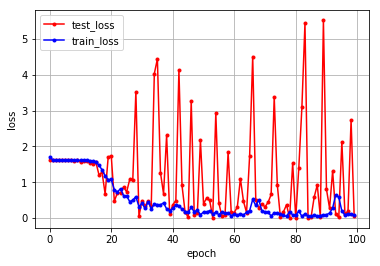

In [5]:
yLoss = hist.history['loss']
yVloss = hist.history['val_loss']

xLen = np.arange(len(yLoss))
plt.plot(xLen,yVloss, marker='.',c='r',label='test_loss')
plt.plot(xLen,yLoss, marker='.',c='b',label='train_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [6]:
scores = model.evaluate_generator(test)
print(scores[1])

0.8666666746139526


## 1.2 ImageDataGenerator로 이미지 증식 후 분류기 만들기

In [7]:
import glob

In [8]:
from keras.preprocessing.image import array_to_img, img_to_array,load_img

In [9]:
imgGen = ImageDataGenerator(rescale=1./255,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.5,
                            zoom_range=[0.8,2.0],
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest')

In [18]:
imgGen.flow_from_directory("./data/img_data/handwriting/train/",
                          target_size=(28,28),
                          batch_size=5,
                          class_mode='categorical')

imgGen.flow_from_directory("./data/img_data/handwriting/test/",
                          target_size=(28,28),
                          batch_size=5,
                          class_mode='categorical')

Found 180 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [19]:
model = Sequential()

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_corssentropy', optimizer='adam', metrics=['accuracy'])

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_11/convolution' (op: 'Conv2D') with input shapes: [?,1,1,256], [3,3,256,128].

In [14]:
images_name=[]
folder_names=['aa','da','ga','ka','sa']
for folder_name in folder_names:
    folder_path = './data/img_data/handwriting/train/{}/*.jpg'.format(folder_name)
    img_names = glob.glob(folder_path)
    print(len(img_names))
    c=0
    for img_name in img_names:
        img = load_img(img_name)
        img = img_to_array(img)
        img = img.reshape((1,)+img.shape)
        
        i = 0
        for batch in imgGen.flow(img,
                                 batch_size=1,
                                 save_to_dir='./data/img_data/handwriting/train_plus/{}'.format(folder_name), # 저장 디렉토리
                                 save_prefix=img_name[37:-4], # 저장 파일 이름 접두어
                                 save_format='jpg'): # 저장 파일 확장자 지정
            c+=1
            i+=1
            if i >=20:
                break
    print(c)

36
720
36
720
36
720
36
720
36
720


In [15]:
imageDataGen = ImageDataGenerator(rescale = 1./255)
train = imageDataGen.flow_from_directory("./data/img_data/handwriting/train_plus",
                                        target_size = (28,28),
                                        batch_size = 3,
                                        class_mode = 'categorical')

test = imageDataGen.flow_from_directory("./data/img_data/handwriting/test",
                                        target_size = (28,28),
                                        batch_size = 3,
                                        class_mode = 'categorical')

Found 3774 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=32)

# np.random.seed(42)
model.fit_generator(train,
                    shuffle=False,
                   steps_per_epoch=12,
                   epochs=200,
                   validation_data=test,)
#                    validation_steps=6,
#                    callbacks=[es])

Epoch 1/200
12/12 [==============================] - 1s 50ms/step - loss: 1.9222 - accuracy: 0.1111 - val_loss: 1.5855 - val_accuracy: 0.2000
Epoch 2/200
12/12 [==============================] - 0s 33ms/step - loss: 1.6371 - accuracy: 0.0833 - val_loss: 1.6120 - val_accuracy: 0.1778
Epoch 3/200
12/12 [==============================] - 0s 41ms/step - loss: 1.6110 - accuracy: 0.2222 - val_loss: 1.6023 - val_accuracy: 0.2000
Epoch 4/200
12/12 [==============================] - 0s 36ms/step - loss: 1.6049 - accuracy: 0.2222 - val_loss: 1.6043 - val_accuracy: 0.2111
Epoch 5/200
12/12 [==============================] - 0s 38ms/step - loss: 1.6056 - accuracy: 0.2222 - val_loss: 1.5933 - val_accuracy: 0.2222
Epoch 6/200
12/12 [==============================] - 1s 45ms/step - loss: 1.6350 - accuracy: 0.1389 - val_loss: 1.5930 - val_accuracy: 0.2000
Epoch 7/200
12/12 [==============================] - 1s 52ms/step - loss: 1.6016 - accuracy: 0.2222 - val_loss: 1.6254 - val_accuracy: 0.2222
Epoch 

In [ ]:
scores = model.evaluate_generator(test, steps=6)
print(scores[1])

## 1.3 작성자 분류기 만들기

In [149]:
images_name=[]
folder_names=['aa','da','ga','ka','sa']
for folder_name in folder_names:
    folder_path = './data/img_data/handwriting/train/{}/*.jpg'.format(folder_name)
    img_names = glob.glob(folder_path)
    images_name+=img_names
    
xTrain = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(images_name)):
    num = int(images_name[i][-6:-4])
    
    img = load_img(images_name[i])
    img = img_to_array(img)
    img = img.reshape((1,)+img.shape)
    xTrain[num-1].append(img)

In [150]:
yTrain = [[1]*10,[2]*10,[3]*10,[4]*10,[5]*10,[6]*10,[7]*10,[8]*10,[9]*10,[10]*10,[11]*10,[12]*10,[13]*10,[14]*10,[15]*10,[16]*10,[17]*10,[18]*10]

In [151]:
images_name=[]
folder_names=['aa','da','ga','ka','sa']
for folder_name in folder_names:
    folder_path = './data/img_data/handwriting/test/{}/*.jpg'.format(folder_name)
    img_names = glob.glob(folder_path)
    images_name+=img_names
    
xTest = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(images_name)):
    num = int(images_name[i][-6:-4])
    
    img = load_img(images_name[i])
    img = img_to_array(img)
    img = img.reshape((1,)+img.shape)
    xTest[num-1].append(img)

In [152]:
yTest = [[1]*5,[2]*5,[3]*5,[4]*5,[5]*5,[6]*5,[7]*5,[8]*5,[9]*5,[10]*5,[11]*5,[12]*5,[13]*5,[14]*5,[15]*5,[16]*5,[17]*5,[18]*5]

In [153]:
xTrain = np.array(xTrain).reshape([180,28,28,3])
xTest = np.array(xTest).reshape([90,28,28,3])
yTrain = np.array(yTrain).reshape([180,])
yTest = np.array(yTest).reshape([90,])

yTrain = pd.DataFrame(yTrain.astype(str))
yTrain = np.array(pd.get_dummies(yTrain))

yTest = pd.DataFrame(yTest.astype(str))
yTest = np.array(pd.get_dummies(yTest))



xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((180, 28, 28, 3), (180, 18), (90, 28, 28, 3), (90, 18))

In [156]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=(28,28,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())



model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))

model.add(Dense(18, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [157]:
#모델 최적화()
modelDir='./CNNmodel/' # '.' 현재 디렉토리를 의미. 현재 디렉토리 안에 myModel 디렉토리 생성하기 위해
if not os.path.exists(modelDir): #만약 myModel 디렉토리가 존재하지 않는다면 # =>os 모듈이 필요했기에 import
    os.mkdir(modelDir)
modelPath="./CNNmodel/{epoch:02d}-{val_loss:.4f}.hdf5"
es = EarlyStopping(monitor='val_loss', patience=32)

model.fit(xTrain,yTrain,
         batch_size=30, epochs=300,
          validation_data=(xTest,yTest),
         callbacks=[es,checkpoint])

Train on 180 samples, validate on 90 samples
Epoch 1/300
180/180 [==============================] - 3s 15ms/step - loss: 37.5826 - accuracy: 0.0722 - val_loss: 11.6440 - val_accuracy: 0.0556

Epoch 00001: val_loss did not improve from 0.00004
Epoch 2/300
180/180 [==============================] - 2s 14ms/step - loss: 11.4020 - accuracy: 0.0500 - val_loss: 3.4027 - val_accuracy: 0.0556

Epoch 00002: val_loss did not improve from 0.00004
Epoch 3/300
180/180 [==============================] - 2s 13ms/step - loss: 3.3837 - accuracy: 0.0389 - val_loss: 2.9114 - val_accuracy: 0.0889

Epoch 00003: val_loss did not improve from 0.00004
Epoch 4/300
180/180 [==============================] - 2s 13ms/step - loss: 2.9463 - accuracy: 0.0500 - val_loss: 2.8923 - val_accuracy: 0.0889

Epoch 00004: val_loss did not improve from 0.00004
Epoch 5/300
180/180 [==============================] - 2s 13ms/step - loss: 2.9301 - accuracy: 0.0722 - val_loss: 2.8649 - val_accuracy: 0.1222

Epoch 00005: val_loss d

180/180 [==============================] - 2s 13ms/step - loss: 1.2955 - accuracy: 0.5333 - val_loss: 1.6492 - val_accuracy: 0.4778

Epoch 00042: val_loss did not improve from 0.00004
Epoch 43/300
180/180 [==============================] - 2s 13ms/step - loss: 1.1209 - accuracy: 0.5778 - val_loss: 1.6897 - val_accuracy: 0.4667

Epoch 00043: val_loss did not improve from 0.00004
Epoch 44/300
180/180 [==============================] - 2s 13ms/step - loss: 1.0971 - accuracy: 0.6111 - val_loss: 1.8285 - val_accuracy: 0.5111

Epoch 00044: val_loss did not improve from 0.00004
Epoch 45/300
180/180 [==============================] - 2s 13ms/step - loss: 1.1107 - accuracy: 0.6278 - val_loss: 1.8153 - val_accuracy: 0.5333

Epoch 00045: val_loss did not improve from 0.00004
Epoch 46/300
180/180 [==============================] - 2s 13ms/step - loss: 1.0827 - accuracy: 0.6222 - val_loss: 1.8811 - val_accuracy: 0.5111

Epoch 00046: val_loss did not improve from 0.00004
Epoch 47/300
180/180 [======


Epoch 00083: val_loss did not improve from 0.00004
Epoch 84/300
180/180 [==============================] - 2s 13ms/step - loss: 0.3615 - accuracy: 0.8722 - val_loss: 2.6545 - val_accuracy: 0.5333

Epoch 00084: val_loss did not improve from 0.00004
Epoch 85/300
180/180 [==============================] - 2s 13ms/step - loss: 0.4671 - accuracy: 0.8500 - val_loss: 2.6021 - val_accuracy: 0.6000

Epoch 00085: val_loss did not improve from 0.00004


In [158]:
model.evaluate(xTest,yTest)

90/90 [==============================] - 0s 2ms/step


[2.602080313364665, 0.6000000238418579]

# 2. Tensorflow
## 2.1 이미지 분류기 만들기

In [9]:
lr = 0.001
epochs = 200
batch_size = 12

In [14]:
x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
y = tf.placeholder(tf.float32, shape=[None, 5])

# hidden
# (필터의 높이, 필터의 넓이, 채널 수, 필터의 개수)
w1 = tf.Variable(tf.random_normal([5,5,1,32], stddev = 0.01))
L1 = tf.nn.conv2d(x, w1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

w2 = tf.Variable(tf.random_normal([3,3,1,64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, w2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# flatten
L2_flat = tf.reshape(L2, [-1, 7*7*64])

w3 = tf.get_variable("w3",
                     shape=[7*7*64, 5],
                     initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([5]))
hf = tf.matmul(L2_flat, w3)+b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y)) # logits= 예측, labels=정답
opt = tf.train.AdamOptimizer(lr).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    avgCost=0
    totalBatch = int(180/batch_size)
    for i in range(1,totalBatch):
        batchX = np.array(xTrain[(i-1)*batch_size:i*batch_size]).reshape([batch_size,28, 28, 3])
        batchY = np.array(yTrain[(i-1)*batch_size:i*batch_size]).reshape([batch_size,28, 28, 3])
        
        cv,_ = sess.run([cost,opt], feed_dict={x:batchX, y:batchY})
        avgCost += cv/totalBatch
    print("Epoch: {} Cost: {:.5f}".format(epoch, cv))
    
pred = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(pred,tf.float32))
print("Accuracy: {}".format(sess.run(acc, feed_dict={x:mnist.test.images, y:mnist.test.labels})))

ValueError: cannot reshape array of size 60 into shape (12,28,28,3)

In [13]:
tf.reset_default_graph()

## 2.2 ImageDataGenerator로 이미지 증식 후 분류기 만들기

## 2.3 작성자 분류기 만들기